# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Vina Auliya Nur Aini
- **Email:** vinaanam67@gmail.com
- **ID Dicoding:** Vina Auliya Nur Aini

## Menentukan Pertanyaan Bisnis


- Pada jam berapa banyak orang yang menyewa sepeda?
- Bagaimana cuaca mempengaruhi jumlah pengguna casual yang menyewa sepeda?

## Import Semua Packages/Library yang Digunakan

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
import babel



# Print version of each library
print("Numpy version:", np.__version__)
print("Pandas version:", pd.__version__)
print("Seaborn version:", sns.__version__)
print("Streamlit version:", st.__version__)
print("Babel version:", babel.__version__)

Numpy version: 2.1.1
Pandas version: 2.2.3
Seaborn version: 0.13.2
Streamlit version: 1.38.0
Babel version: 2.16.0


## Data Wrangling

### Gathering Data

In [60]:
#load tabel hour
hour_df = pd.read_csv("data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- saya menggunakan data hour.csv yang memiliki atribut : instant, dteday, season, yr, mnth, hr, holiday, weekday,workingday, weathersit,temp, atemp,hum,windspeed,casual,registered, dan cnt


### Assessing Data

In [61]:
#memeriksa type data dan mengetahui jumlah data 
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [19]:
#memeriksa missing value
day_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [9]:
#memeriksa duplikasi
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [21]:
#memeriksa parameter statistika
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [24]:
#menampilkan jumlah pengguna casual terbanyak
hour_df[hour_df.casual == hour_df.casual.max()]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
10477,10478,2012-03-17,1,1,3,16,0,6,0,1,0.64,0.6212,0.5,0.0,367,318,685


**Insight:**
- saat melakukan penilaian, data hour.py tidak terdapat missing value, duplicate, inaccurate value
- data sudah bersih

### Cleaning Data

**Insight:**
- tidak dilakukan pembersihan data karena tidak ada permasalahan pada data seperti duplicate,missing value, dll

## Exploratory Data Analysis (EDA)

In [42]:
#menghitung total penyewa per jam
bike_per_hour = hour_df.groupby('hr')['cnt'].sum()

#mencari jam berapa banyak yang menyewa
max_hours = bike_per_hour.idxmax()
min_hours = bike_per_hour.idxmin()

# Menampilkan hasil
print(f"Jam terbanyak : {max_hours} dengan {bike_per_hour.max()} penyewa")
print(f"Jam paling sedikit: {min_hours} dengan {bike_per_hour.min()} penyewa")



Jam terbanyak: 17 dengan 336860 penyewa
Jam paling sedikit: 4 dengan 4428 penyewa


In [55]:
# Menghitung jumlah pengguna casual berdasarkan weathersit
casual_by_weathersit = hour_df.groupby('weathersit')['casual'].sum()

# Mengurutkan hasil berdasarkan jumlah pengguna casual
sorted_casual_by_weathersit = casual_by_weathersit.sort_values(ascending=False)

# Menampilkan hasil
print(sorted_casual_by_weathersit)

weathersit
1    462745
2    134481
3     22783
4         8
Name: casual, dtype: int64


In [119]:
hour_df.groupby(by="weathersit").agg({
    "casual": "sum",
    "casual":  ["min", "max"]
})

casual     
              min  max
weathersit            
1               0  367
2               0  350
3               0  263
4               1    6

### Explore ...

**Insight:**
- xxx
- xxx

## Visualization & Explanatory Analysis

### Pertanyaan 1:

    hr     cnt
0   17  336860
1   18  309772
2    8  261001
3   16  227748
4   19  226789
5   13  184919
6   12  184414
7   15  183149
8   14  175652
9   20  164550
10   9  159438
11   7  154171
12  11  151320
13  10  126257
14  21  125445
15  22   95612
16  23   63941
17   6   55132
18   0   39130
19   1   24164
20   2   16352
21   5   14261
22   3    8174
23   4    4428


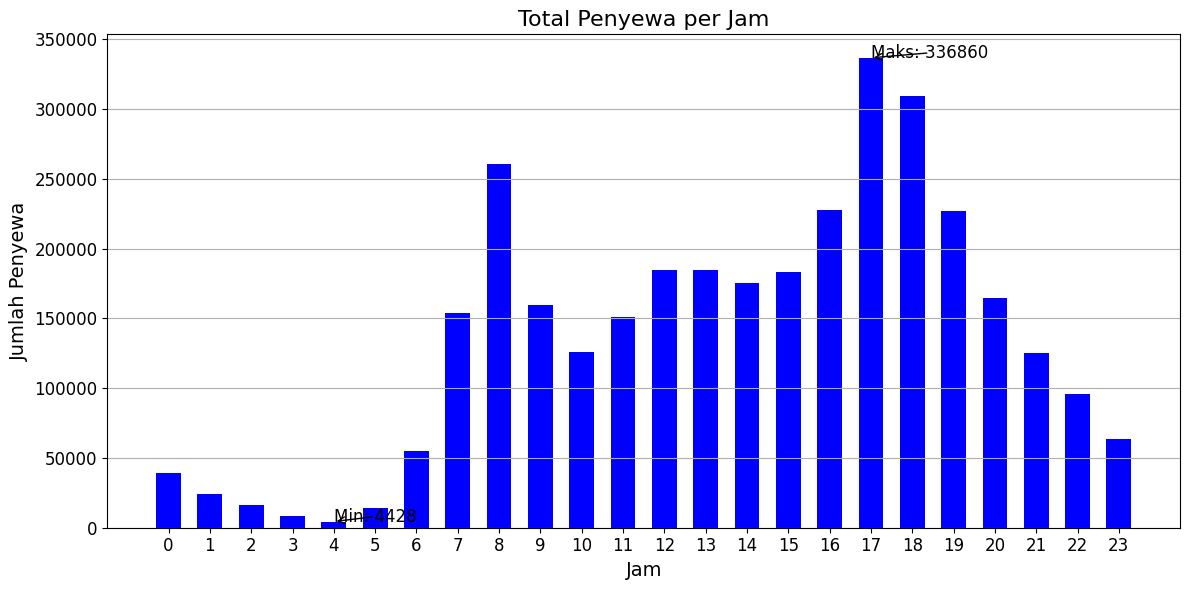

In [107]:
# Membuat DataFrame
hour_df = pd.DataFrame(hour_df)

# Menghitung total penyewa per jam
bike_per_hour = hour_df.groupby('hr')['cnt'].sum().reset_index()

# Mengurutkan DataFrame berdasarkan jumlah pengguna (cnt) dari yang paling banyak ke paling sedikit
sorted_bike_per_hour = bike_per_hour.sort_values(by='cnt', ascending=False).reset_index(drop=True)

# Menampilkan DataFrame yang telah diurutkan
print(sorted_bike_per_hour)

# Membuat bar chart
plt.figure(figsize=(12, 6))
plt.bar(sorted_bike_per_hour['hr'], sorted_bike_per_hour['cnt'], color='b', width=0.6)

# Menambahkan judul dan label
plt.title('Total Penyewa per Jam', fontsize=16)
plt.xlabel('Jam', fontsize=14)
plt.ylabel('Jumlah Penyewa', fontsize=14)
plt.xticks(sorted_bike_per_hour['hr'], fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y')

# Menambahkan anotasi untuk titik maksimum dan minimum
max_cnt = sorted_bike_per_hour['cnt'].max()
min_cnt = sorted_bike_per_hour['cnt'].min()
max_hour = sorted_bike_per_hour.loc[sorted_bike_per_hour['cnt'].idxmax(), 'hr']
min_hour = sorted_bike_per_hour.loc[sorted_bike_per_hour['cnt'].idxmin(), 'hr']

plt.annotate(f'Maks: {max_cnt}', xy=(max_hour, max_cnt), xytext=(max_hour, max_cnt + 1),
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=12)
plt.annotate(f'Min: {min_cnt}', xy=(min_hour, min_cnt), xytext=(min_hour, min_cnt + 1),
             arrowprops=dict(facecolor='red', arrowstyle='->'), fontsize=12)

# Menampilkan chart
plt.tight_layout()
plt.show()


### Pertanyaan 2:

weathersit
1    462745
2    134481
3     22783
4         8
Name: casual, dtype: int64


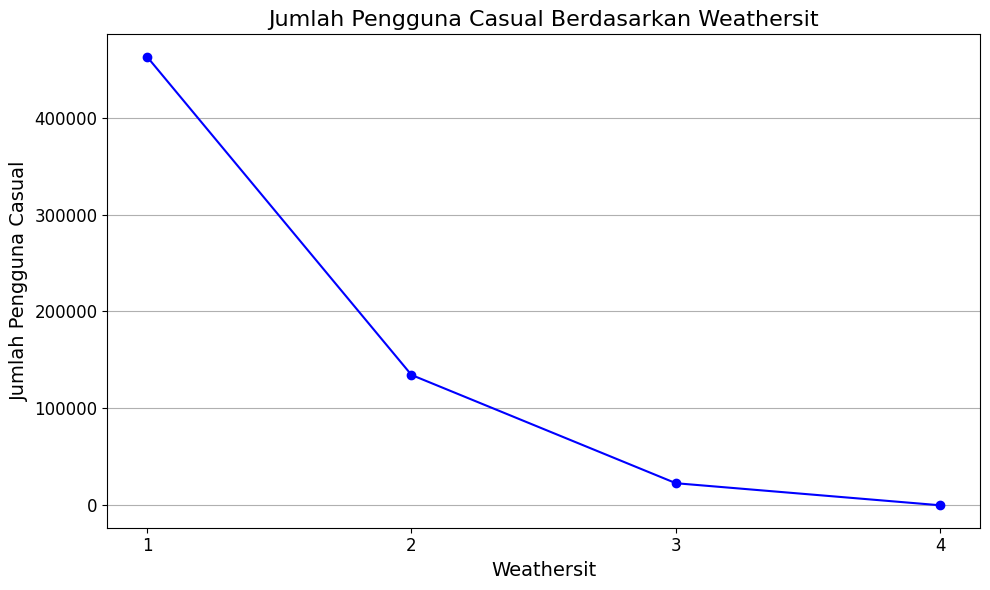

In [108]:
# Membuat DataFrame
hour_df = pd.DataFrame(hour_df)

# Menghitung jumlah pengguna casual berdasarkan weathersit
casual_by_weathersit = hour_df.groupby('weathersit')['casual'].sum()

# Mengurutkan hasil berdasarkan jumlah pengguna casual
sorted_casual_by_weathersit = casual_by_weathersit.sort_values(ascending=False)

# Menampilkan hasil
print(sorted_casual_by_weathersit)

# Membuat line chart
plt.figure(figsize=(10, 6))
plt.plot(sorted_casual_by_weathersit.index, sorted_casual_by_weathersit.values, marker='o', linestyle='-', color='b')

# Menambahkan judul dan label
plt.title('Jumlah Pengguna Casual Berdasarkan Weathersit', fontsize=16)
plt.xlabel('Weathersit', fontsize=14)
plt.ylabel('Jumlah Pengguna Casual', fontsize=14)
plt.xticks(sorted_casual_by_weathersit.index, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y')

# Menampilkan chart
plt.tight_layout()
plt.show()

**Insight:**
- visualisasi data untuk pertanyaan 1 dibuat dengan dataframe dan bar chart
- visualisasi data untuk pertanyaan 2 dibuat dengan dataframe dan line chart

## Analisis Lanjutan (Opsional)

In [6]:
hour_df.to_csv("data/all_data.csv", index=False)

## Conclusion

- Conclution pertanyaan 1
    - Pada jam berapa banyak orang yang menyewa sepeda? : banyak orang yang menyewa sepeda di jam 17 atau jam 5 sore.
- Conclution pertanyaan 2
    - Bagaimana cuaca mempengaruhi jumlah pengguna casual yang menyewa sepeda? : cuaca sangat mempengaruhi pengguna yang menyewa sepeda. seperti saat eksplorasi hasilnya ketika cuaca 1 : (Cerah, Sedikit awan, Berawan sebagian, Berawan sebagian)462745 pengguna yang menyewa sepeda. sedangkan di cuaca 4 : (Hujan Lebat + Es + Badai Petir + Kabut, Salju + Kabut) hanya 8 pengguna yang menyewa.